In [45]:
# importing libraries
import os
import warnings

import torch
from PIL import Image
from torchvision.datasets import VisionDataset
from torchvision.datasets.utils import download_and_extract_archive

In [46]:
class MNISTM(VisionDataset):
    """MNIST-M Dataset.
    """

    resources = [
        ('https://github.com/liyxi/mnist-m/releases/download/data/mnist_m_train.pt.tar.gz',
         '191ed53db9933bd85cc9700558847391'),
        ('https://github.com/liyxi/mnist-m/releases/download/data/mnist_m_test.pt.tar.gz',
         'e11cb4d7fff76d7ec588b1134907db59')
    ]

    training_file = "mnist_m_train.pt"
    test_file = "mnist_m_test.pt"
    classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four',
               '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']

    @property
    def train_labels(self):
        warnings.warn("train_labels has been renamed targets")
        return self.targets

    @property
    def test_labels(self):
        warnings.warn("test_labels has been renamed targets")
        return self.targets

    @property
    def train_data(self):
        warnings.warn("train_data has been renamed data")
        return self.data

    @property
    def test_data(self):
        warnings.warn("test_data has been renamed data")
        return self.data

    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        """Init MNIST-M dataset."""
        super(MNISTM, self).__init__(root, transform=transform, target_transform=target_transform)

        self.train = train

        if download:
            self.download()

        if not self._check_exists():
            raise RuntimeError("Dataset not found." +
                               " You can use download=True to download it")

        if self.train:
            data_file = self.training_file
        else:
            data_file = self.test_file

        print(os.path.join(self.processed_folder, data_file))

        self.data, self.targets = torch.load(os.path.join(self.processed_folder, data_file))

    def __getitem__(self, index):
        """Get images and target for data loader.
        Args:
            index (int): Index
        Returns:
            tuple: (image, target) where target is index of the target class.
        """
        img, target = self.data[index], int(self.targets[index])

        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        img = Image.fromarray(img.squeeze().numpy(), mode="RGB")

        if self.transform is not None:
            img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target

    def __len__(self):
        """Return size of dataset."""
        return len(self.data)

    @property
    def raw_folder(self):
        return os.path.join(self.root, self.__class__.__name__, 'raw')

    @property
    def processed_folder(self):
        return os.path.join(self.root, self.__class__.__name__, 'processed')

    @property
    def class_to_idx(self):
        return {_class: i for i, _class in enumerate(self.classes)}

    def _check_exists(self):
        return (os.path.exists(os.path.join(self.processed_folder, self.training_file)) and
                os.path.exists(os.path.join(self.processed_folder, self.test_file)))

    def download(self):
        """Download the MNIST-M data."""

        if self._check_exists():
            return

        os.makedirs(self.raw_folder, exist_ok=True)
        os.makedirs(self.processed_folder, exist_ok=True)

        # download files
        for url, md5 in self.resources:
            filename = url.rpartition('/')[2]
            download_and_extract_archive(url, download_root=self.raw_folder,
                                         extract_root=self.processed_folder,
                                         filename=filename, md5=md5)

        print('Done!')

    def extra_repr(self):
        return "Split: {}".format("Train" if self.train is True else "Test")

In [47]:
# loading trainset from MNISTM class
mnistm_trainset = MNISTM(root='./data', train=True, download=True, transform=None)

./data/MNISTM/processed/mnist_m_train.pt


In [48]:
# loading testingset from MNISTM class
mnistm_testset = MNISTM(root='./data', train=False, download=True, transform=None)

./data/MNISTM/processed/mnist_m_test.pt


In [49]:
print(mnistm_trainset)

Dataset MNISTM
    Number of datapoints: 60000
    Root location: ./data
    Split: Train


##### There are total 60000 datapoints are there in training set

In [50]:
print(mnistm_testset)

Dataset MNISTM
    Number of datapoints: 10000
    Root location: ./data
    Split: Test


There are total 10000 datapoints are there in testing set

In [51]:
(mnistm_trainset[0][0])

In [52]:
(mnistm_trainset[0][1])

5

In [53]:
import numpy as np

In [54]:
a = np.array(mnistm_trainset[1][0])

In [55]:
print(a)

[[[255 208 153]
  [255 207 151]
  [255 205 150]
  ...
  [255 205 144]
  [255 206 145]
  [253 203 142]]

 [[255 208 152]
  [253 206 150]
  [253 206 150]
  ...
  [255 206 143]
  [255 207 144]
  [253 205 143]]

 [[255 206 150]
  [253 206 150]
  [254 207 151]
  ...
  [253 197 136]
  [250 199 136]
  [254 206 144]]

 ...

 [[255 198 144]
  [255 193 141]
  [255 191 139]
  ...
  [255 199 148]
  [253 197 146]
  [255 199 150]]

 [[255 207 150]
  [255 205 148]
  [253 202 145]
  ...
  [255 203 151]
  [250 197 145]
  [251 198 146]]

 [[255 205 148]
  [255 208 150]
  [255 207 149]
  ...
  [255 202 150]
  [255 202 150]
  [255 202 150]]]


#### we want data in numpy array formate

In [56]:
x_train , y_train = [np.array(mnistm_trainset[i][0]) for i in range(60000)], [(mnistm_trainset[i][1]) for i in range(60000)]

In [57]:
len(x_train),len(y_train)

(60000, 60000)

In [58]:
type(x_train)

list

In [59]:
x_train = np.array(x_train)

In [60]:
x_train.shape

(60000, 28, 28, 3)

##### As we can see image shape is 28*28 and channel is 3 because we have RGB formate

In [61]:
y_train = np.array(y_train)

In [62]:
y_train.shape

(60000,)

In [63]:
x_train[0:5]

array([[[[ 60,  77, 133],
         [ 61,  78, 134],
         [ 62,  79, 135],
         ...,
         [ 57,  76, 132],
         [ 57,  76, 132],
         [ 57,  77, 130]],

        [[ 60,  77, 133],
         [ 61,  78, 134],
         [ 61,  78, 134],
         ...,
         [ 57,  76, 132],
         [ 57,  76, 132],
         [ 57,  76, 132]],

        [[ 61,  78, 134],
         [ 61,  78, 134],
         [ 61,  78, 134],
         ...,
         [ 56,  75, 131],
         [ 56,  75, 131],
         [ 57,  76, 132]],

        ...,

        [[ 57,  76, 134],
         [ 57,  77, 130],
         [ 57,  77, 130],
         ...,
         [  6,  34,  35],
         [  6,  35,  33],
         [  7,  36,  32]],

        [[ 58,  77, 135],
         [ 58,  77, 133],
         [ 57,  77, 130],
         ...,
         [  9,  37,  38],
         [  8,  37,  35],
         [  8,  37,  35]],

        [[ 57,  73, 133],
         [ 62,  78, 137],
         [ 58,  75, 131],
         ...,
         [  8,  37,  33],
        

In [64]:
type(x_train)

numpy.ndarray

In [65]:
x_test , y_test = [np.array(mnistm_testset[i][0]) for i in range(10000)], [(mnistm_testset[i][1]) for i in range(10000)]

In [66]:
len(x_test)

10000

In [67]:
type(x_test)

list

In [68]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [69]:
type(x_test)

numpy.ndarray

In [70]:
x_test.shape

(10000, 28, 28, 3)

train: X=(60000, 28, 28, 3),y=(60000,)
train: X=(10000, 28, 28, 3),y=(10000,)


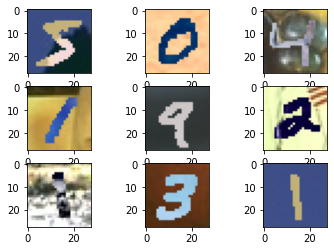

In [71]:
import matplotlib.pyplot as plt
print('train: X=%s,y=%s' % (x_train.shape,y_train.shape))
print('train: X=%s,y=%s' % (x_test.shape,y_test.shape))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i],cmap = plt.get_cmap('gray'))
plt.show()

In [72]:
# reshaping x_train and x_test and normalizing it by dividing 255 because the range is from 0 to 255

x_train = x_train.reshape((60000,28,28,3))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000,28,28,3))
x_test = x_test.astype('float32')/255

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
x_train

In [74]:
from keras import layers
from keras import models
from keras.utils import plot_model

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

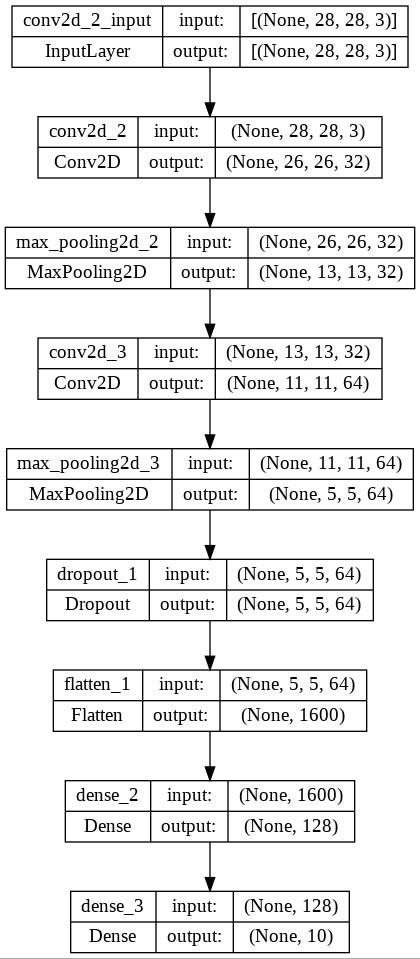

In [75]:
plot_model(model,'model.jpg',show_shapes = True)

In [76]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])


In [77]:
History = model.fit(x_train, y_train, epochs=10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 59s 124ms/step - loss: 0.7551 - accuracy: 0.7626
Epoch 2/10
469/469 [==============================] - 56s 120ms/step - loss: 0.3030 - accuracy: 0.9091
Epoch 3/10
469/469 [==============================] - 55s 117ms/step - loss: 0.2376 - accuracy: 0.9274
Epoch 4/10
469/469 [==============================] - 54s 116ms/step - loss: 0.1994 - accuracy: 0.9373
Epoch 5/10
469/469 [==============================] - 54s 116ms/step - loss: 0.1711 - accuracy: 0.9467
Epoch 6/10
469/469 [==============================] - 54s 116ms/step - loss: 0.1570 - accuracy: 0.9514
Epoch 7/10
469/469 [==============================] - 55s 116ms/step - loss: 0.1378 - accuracy: 0.9566
Epoch 8/10
469/469 [==============================] - 54s 116ms/step - loss: 0.1258 - accuracy: 0.9601
Epoch 9/10
469/469 [==============================] - 55s 117ms/step - loss: 0.1169 - accuracy: 0.9631
Epoch 10/10
469/469 [==============================] - 54s 116ms/step - l

In [78]:
History.model.save('MNIST-M.h5')

In [79]:
loss,accuracy = model.evaluate(x_test, y_test,verbose = 0)
print(f'Accuarcy: {accuracy*100}')
print(f'Loss: {loss}')


Accuarcy: 97.3800003528595
Loss: 0.09118831157684326


In [81]:
prediction = model.predict(x_test,verbose = 0)
print(np.argmax(np.round(prediction[40])))

1


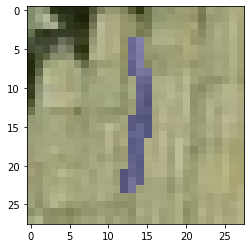

In [82]:
import matplotlib.pyplot as plt
plt.imshow(x_test[40])
plt.show()
